# Assignment 9
Linda Koine, Jens Weimann, Markus Wiktorin

## 1

In [1]:
from IPython.display import Image
#Image("")

## 2

In [82]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
class SOM:
    def __init__(self, input_dimension, map_size, distance_function, learning_rate, weights=None):
        self.input_dimension = input_dimension
        self.map_size = map_size
        self.distance_function = distance_function
        self.learning_rate = learning_rate
        
        if weights is None:
            self.weights = np.random.rand(map_size, input_dimension)
        else:
            self.weights = weights
            
    def plot_weights(self):
        plt.figure()
        plt.axis("equal")
        x = self.weights[:,0]
        y = self.weights[:,1]
        plt.plot(x, y, c="r")
        plt.scatter(self.weights[:,0], self.weights[:,1], c="r")
        
    def get_closest_weight_index(self, sample, exclude_indices=None):
        min_idx = 0
        while (exclude_indices != None) and (min_idx in exclude_indices):
            min_idx = min_idx + 1
            
        min_distance = self.distance_function(self.weights[min_idx], sample)
        idx = 0
        for weight in self.weights:
            distance = self.distance_function(weight, sample)
            if distance < min_distance:
                if exclude_indices == None or idx not in exclude_indices:                    
                    min_distance = distance
                    min_idx = idx
            idx = idx + 1
        return min_idx
        
    def train(self, sample_set, distance_treshold, epsilon):
        changed = 100
        while changed > epsilon:
            changed = 0
            for sample in sample_set:
                min_idx = self.get_closest_weight_index(sample)
                for i in range(len(self.weights)):
                    distance = self.distance_function(self.weights[min_idx], self.weights[i])
                    if i == min_idx or distance < distance_treshold:
                        direction = sample - self.weights[i]
                        delta = self.learning_rate * (1 / (distance + 1)) * direction
                        self.weights[i] = self.weights[i] + delta
                        changed = changed + np.sum(delta)
                        
    def fit_to_points(self, sample_set):
        altered_weights = []
        for sample in sample_set:
            min_idx = self.get_closest_weight_index(sample, altered_weights)
            self.weights[min_idx] = sample
            altered_weights.append(min_idx)

In [68]:
def simple_distance_function(x, y):
    return abs(x - y)

In [81]:
input = [0.1, 0.2, 0.4, 0.5]
learning_rate = 0.1
input_dimension = 1
nodes = 2
epsilon = 0.01
distance_treshold = 0

weights1 = np.array([0.15, 0.45])
weights2 = np.array([0.3, 0.9])

som = SOM(input_dimension, nodes, simple_distance_function, learning_rate, weights1)
som.train(input, distance_treshold, epsilon)
print(som.weights)

som = SOM(input_dimension, nodes, simple_distance_function, learning_rate, weights2)
som.train(input, distance_treshold, epsilon)
print(som.weights)

[ 0.1505  0.4505]
[ 0.30632  0.9    ]


## 3

In [29]:
def one_dim_circle_distance(p1, p2):
    return np.linalg.norm(p1 - p2)

In [30]:
def plot_problem(samples, weights):
    plt.figure()
    plt.axis("equal")
    plt.plot(weights[:,0], weights[:,1], c="r")
    plt.scatter(weights[:,0], weights[:,1], c="orange")
    plt.scatter(samples[:,0], samples[:,1], c="g")
    plt.legend(["solution", "weights", "cities"])

In [139]:
def tsp_distance_som(weights):
    distance = 0
    start = weights[0]
    last = start
    for weight in weights[1:]:
        distance = distance + np.linalg.norm(last - weight)
        last = weight
    distance = distance + np.linalg.norm(last - start)
    return distance

def tsp_distance(coords, order):
    distance = 0
    last = 0
    for i in range(1, len(order)):
        distance = distance + np.linalg.norm(coords[order[last]] - coords[order[i]])
        last = i
    distance = distance + np.linalg.norm(coords[order[0]] - coords[order[last]])
    return distance

In [163]:
import itertools
def tsp_brut_force(cities, plot=True):
    permutations = itertools.permutations(range(len(cities)))
    min_dist = 9999999999999999
    for order in permutations:
        dist = tsp_distance(cities, order)
        if dist < min_dist:
            min_dist = dist
            min_order = order
    
    if plot:
        plt.figure()
        plt.axis("equal")
        x = [cities[i][0] for i in min_order]
        y = [cities[i][1] for i in min_order]
        x.append(cities[min_order[0]][0])
        y.append(cities[min_order[0]][1])
        plt.title("Best solution with brut force")
        plt.plot(x, y, c="r")
        plt.scatter(x, y, c="g")
        plt.legend(["solution", "cities"])
        plt.show()
    return min_order

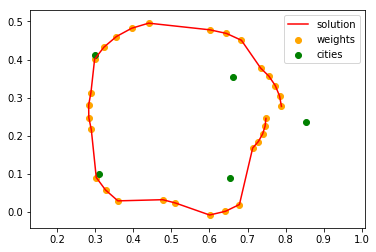

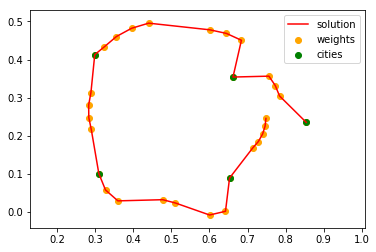

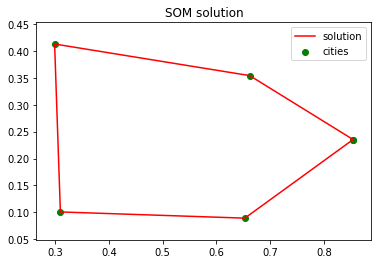

Solved in 0.06657671928405762 seconds
Solve TSP brut force...


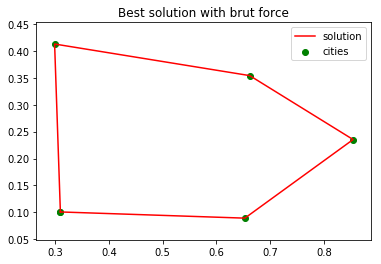

Solved in 0.37220311164855957 seconds
Our Distance:  1.49814418266
Best distance:  1.49814418266
How close to optimum:  100.0 %


In [175]:
num_cities = 5
circle_points = 30
learning_rate = 0.4
input_dimension = 2
distance_treshold = 0.3
training_epsilon = 0.05

cities = np.random.rand(num_cities, input_dimension)
mean_x = np.mean(cities, 0)[0]
mean_y = np.mean(cities, 0)[1]

angles = np.linspace(0, 2 * np.pi, circle_points)
x = 0.3 * np.cos(angles) + mean_x
y = 0.3 * np.sin(angles) + mean_y
weights = np.column_stack((x, y))

start_time = time.time()
som = SOM(input_dimension, circle_points, one_dim_circle_distance, learning_rate, weights)
som.train(cities, distance_treshold, training_epsilon)
plot_problem(cities, som.weights)
som.fit_to_points(cities)
elapsed_time = time.time() - start_time
plot_problem(cities, som.weights)

cities_in_order = []
for weight in som.weights:
    if weight in cities:
        cities_in_order.append(weight)

cities_in_order = np.array(cities_in_order)
        
plt.figure()
plt.axis("equal")
x = cities_in_order[:,0]
y = cities_in_order[:,1]
x = np.append(x, cities_in_order[0,0])
y = np.append(y, cities_in_order[0,1])
plt.title("SOM solution")
plt.plot(x, y, c="r")
plt.scatter(x, y, c="g")
plt.legend(["solution", "cities"])

plt.show()
print("Solved in", elapsed_time, "seconds")
our_distance = tsp_distance_som(cities_in_order)

print("Solve TSP brut force...")
start_time = time.time()
best_order = tsp_brut_force(cities)
elapsed_time = time.time() - start_time
print("Solved in", elapsed_time, "seconds")
best_distance = tsp_distance(cities, best_order)

print("Our Distance: ", our_distance)
print("Best distance: ", best_distance)
print("How close to optimum: ", best_distance / our_distance * 100, "%")

## 4